# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [13]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 15)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,1


In [14]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

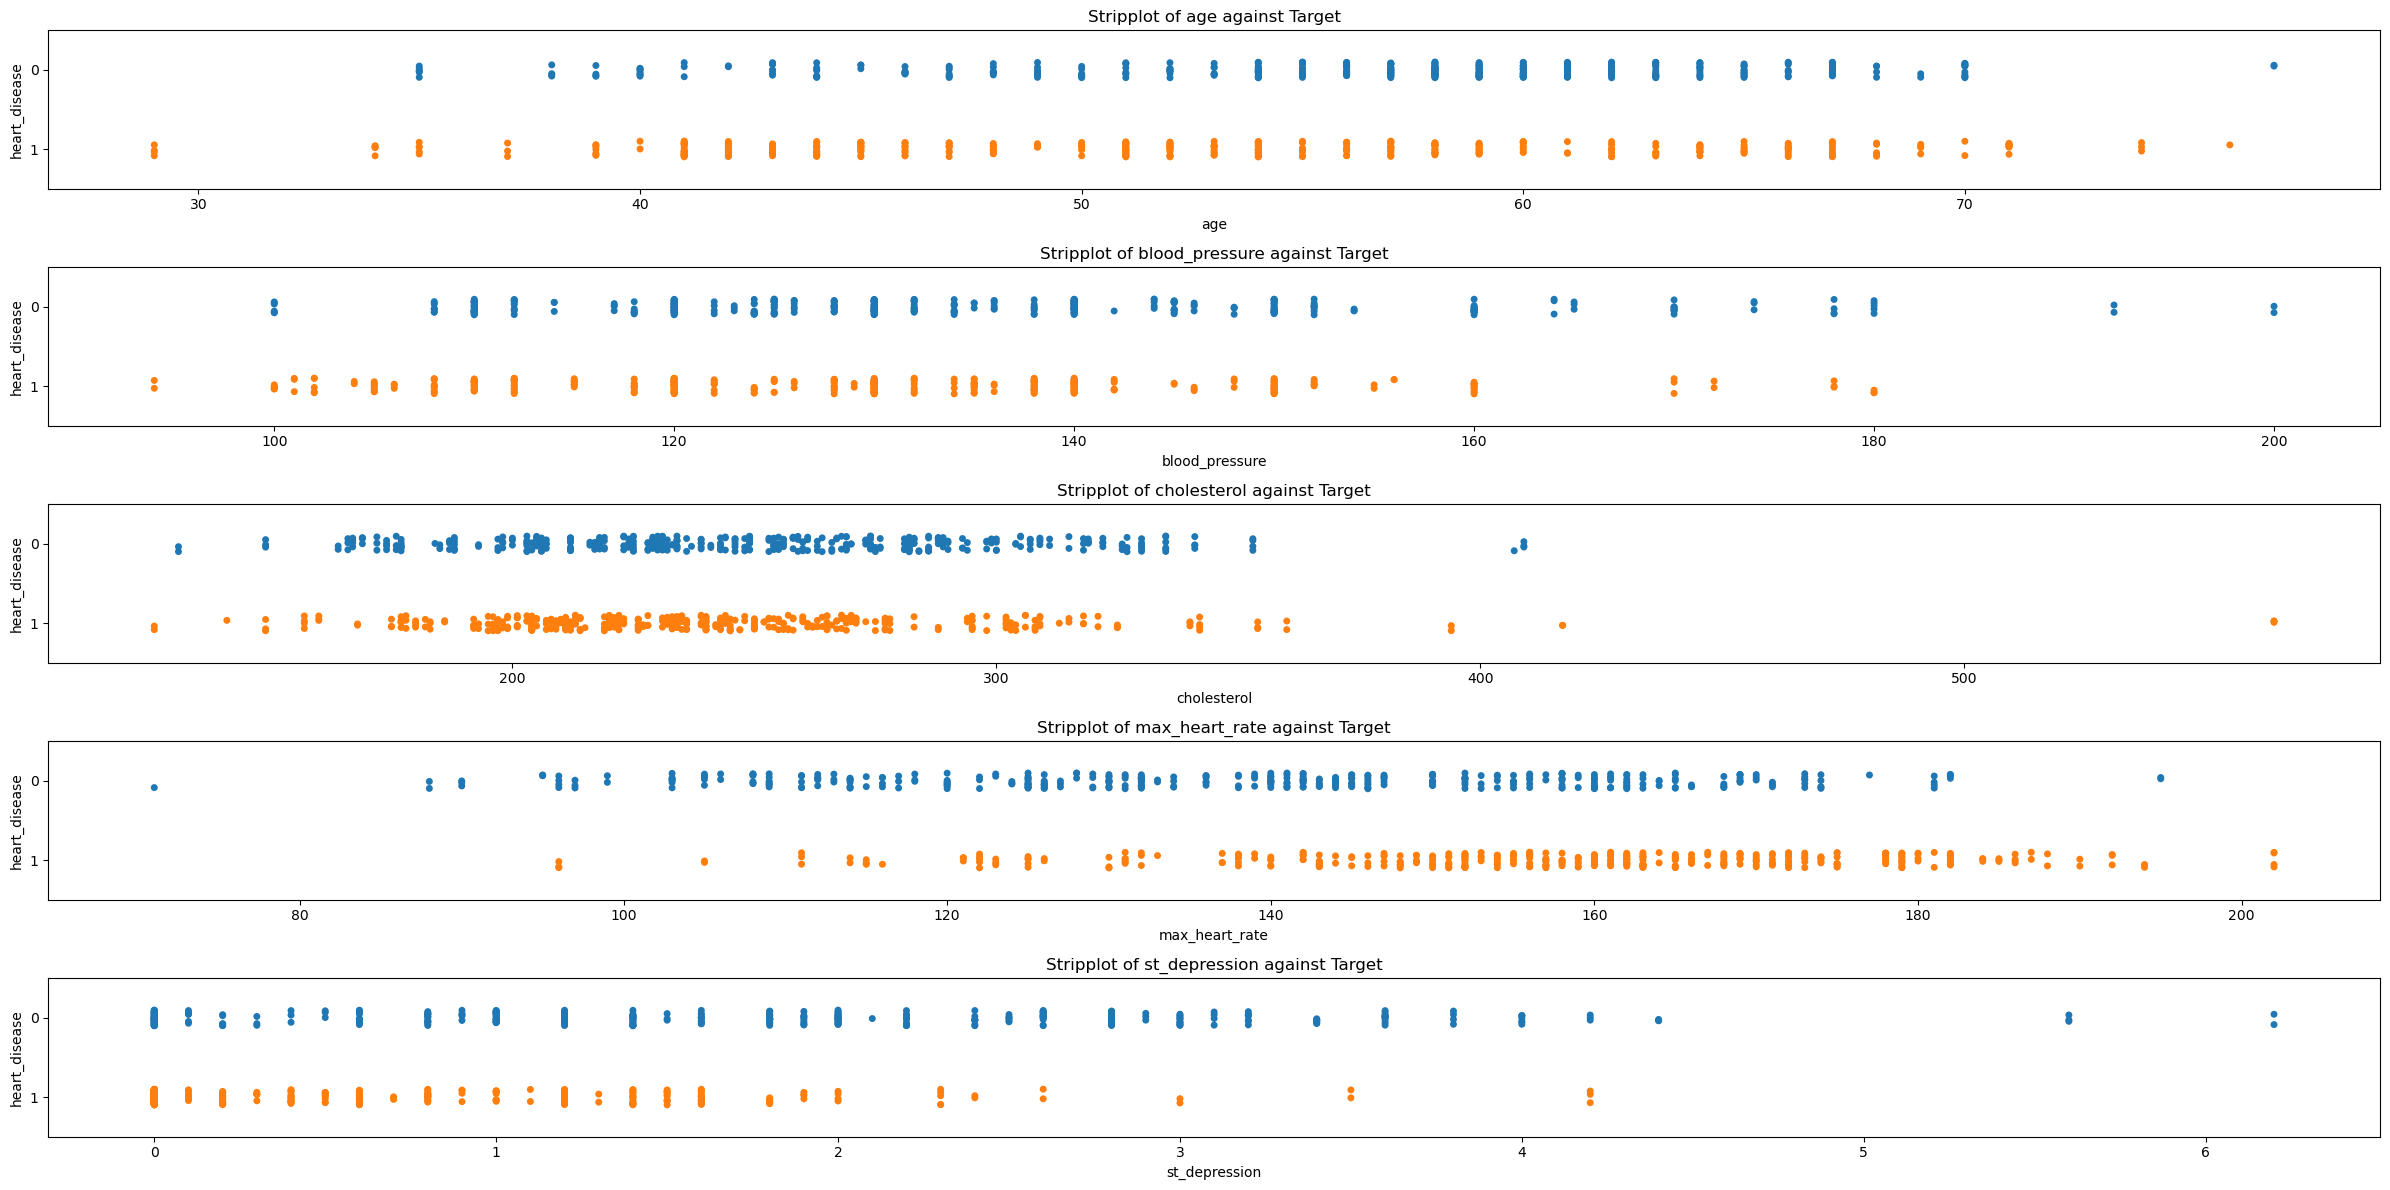

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

f, axes = plt.subplots(len(num_var), 1, figsize = (24, 12))

for i, var in enumerate(num_var):
    X_train, X_test, y_train, y_test = train_test_split(clean_data[var], clean_data["heart_disease"], \
                                                        test_size = 0.20, random_state = 42)
    
    train_data = pd.concat([X_train, y_train], axis = 1)
    
    # Plotting the stripplots

    sb.stripplot(x = var, y = "heart_disease", data = train_data, orient = "h", ax = axes[i])\
    .set(xlabel = var, ylabel = "heart_disease", title = f"Stripplot of {var} against Target")

f.tight_layout()

We shall make use of a decision tree to see if any numerical variables might play a role in predicting our target since the swarmplot doesnt really tell us anything

In [16]:
#Create decision tree object
dec_tree = DecisionTreeClassifier(max_depth = 4)

#Make train_splits into a 2 dimensional array
x_train = pd.concat(train_splits, axis=1)

#Train the decision tree model
dec_tree.fit(x_train, target_train)

#Plot the decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dec_tree, filled=True, rounded=True, 
          feature_names = x_train.columns.tolist(),
          class_names=["No Heart Disease","Heart Disease"]);

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
print(accuracy_score(target_train, dec_tree.predict(x_train)))